In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
ALGO = ['correction', 'detection_correction']
COMMODITY = ['cobalt_shift_new_20', 'copper_shift_new_20', 'magnesium_shift_new_20', 'nickel_shift_new_20']

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_ablation_barcharts(xlsx_path, algorithm, comm):
    # Read the xlsx file into a pandas DataFrame
    comm = comm.split('_')[0]
    comm = comm.capitalize()    
    df = pd.read_excel(xlsx_path)
    
    # Fill empty 'Exclude' fields with 'None'
    df['Exclude'].fillna('None', inplace=True)
    
    # Filter based on the algorithm
    df = df[df['Algorithm'] == algorithm]

    # Identify unique models
    models = df['Model'].unique()
    
    for model in models:
        model_df = df[df['Model'] == model]

        # Prepare the data for plotting
        excluded_models = sorted(model_df['Exclude'].unique(), key=lambda x: (x != 'None'))
        prec_edcr = model_df.groupby('Exclude')['Precision (EDCR)'].mean().reindex(excluded_models)
        rec_edcr = model_df.groupby('Exclude')['Recall (EDCR)'].mean().reindex(excluded_models)

        barWidth = 0.35
        r1 = np.arange(len(prec_edcr))
        r2 = [x + barWidth for x in r1]

        all_values = pd.concat([prec_edcr, rec_edcr])
        min_value = all_values.min()
        max_value = all_values.max()
        margin = (max_value - min_value) * 0.1
        y_min = max(min_value - margin, 0)
        y_max = min(max_value + margin, 1)

        plt.figure(figsize=(10,5))
        bars1 = plt.bar(r1, prec_edcr, color='k', width=barWidth, edgecolor='grey', label='Precision (EDCR)', zorder=1)
        bars2 = plt.bar(r2, rec_edcr, color='white', width=barWidth, edgecolor='black', label='Recall (EDCR)', zorder=2)

        # Calculate differences from 'None' for annotations
        none_precision = prec_edcr.get('None', 0)
        none_recall = rec_edcr.get('None', 0)
        for bar, label in zip(bars1, excluded_models):
            current_value = prec_edcr[label]
            diff = current_value - none_precision
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{sign}{abs(diff):.2f}', ha='center', va='bottom')

        for bar, label in zip(bars2, excluded_models):
            current_value = rec_edcr[label]
            diff = current_value - none_recall
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{sign}{abs(diff):.2f}', ha='center', va='bottom')

        plt.xlabel('Excluded Model', fontweight='bold')
        # Replace 'CNNA' with 'CNN Attention' in the x-axis labels
        labels = [label.replace('CNNA', 'CNN Attention') for label in excluded_models]
        plt.xticks([r + barWidth/2 for r in range(len(prec_edcr))], labels)
        plt.ylabel('Performance',  fontweight='bold')
        plt.title(f'{comm}: EDCR Performance for {model} using {algorithm}')
        plt.ylim([y_min, y_max])
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.3, axis='y', zorder=-1)

        # Position the legend below the chart in one row
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(bars1))

        plt.xticks(rotation=0)
        plt.tight_layout()

        plt.show()
        plt.close()


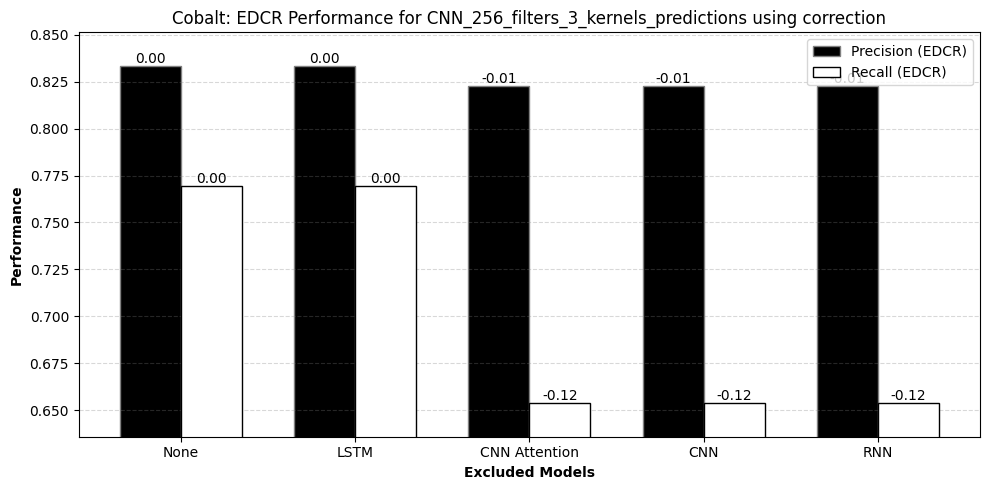

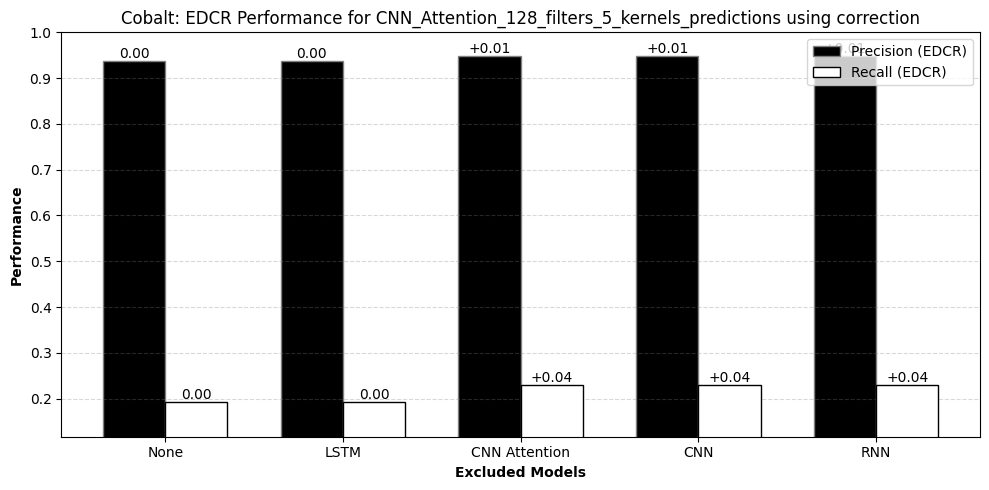

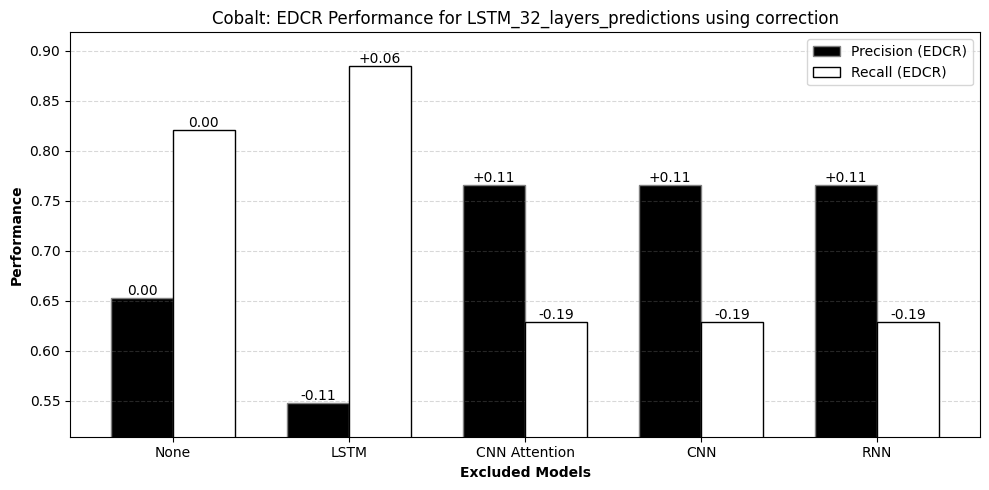

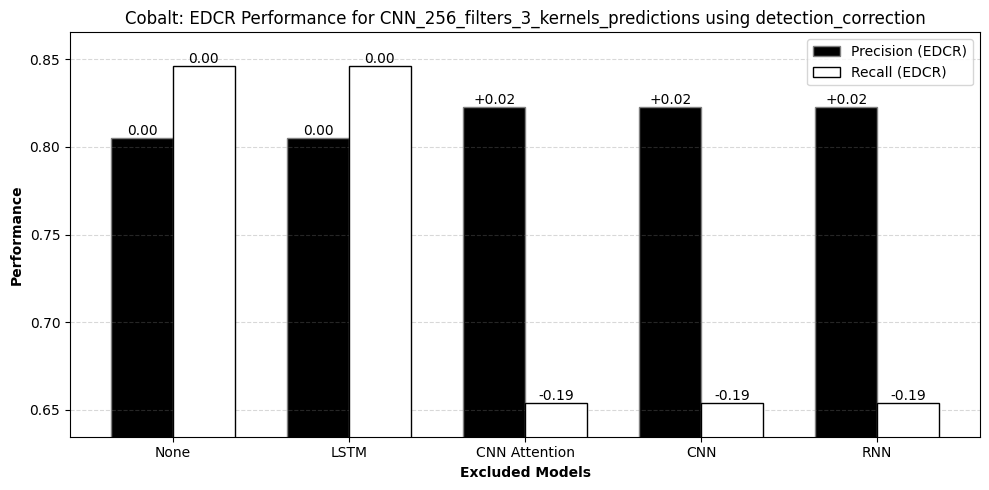

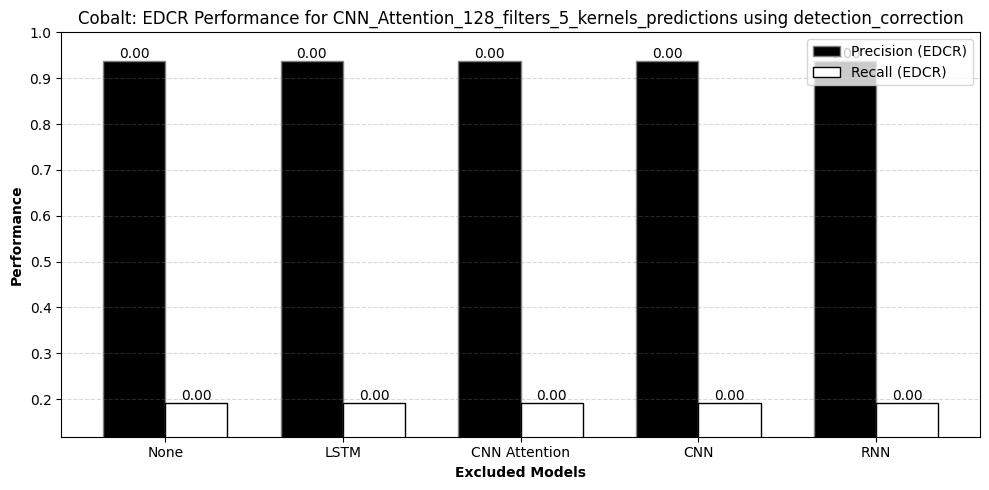

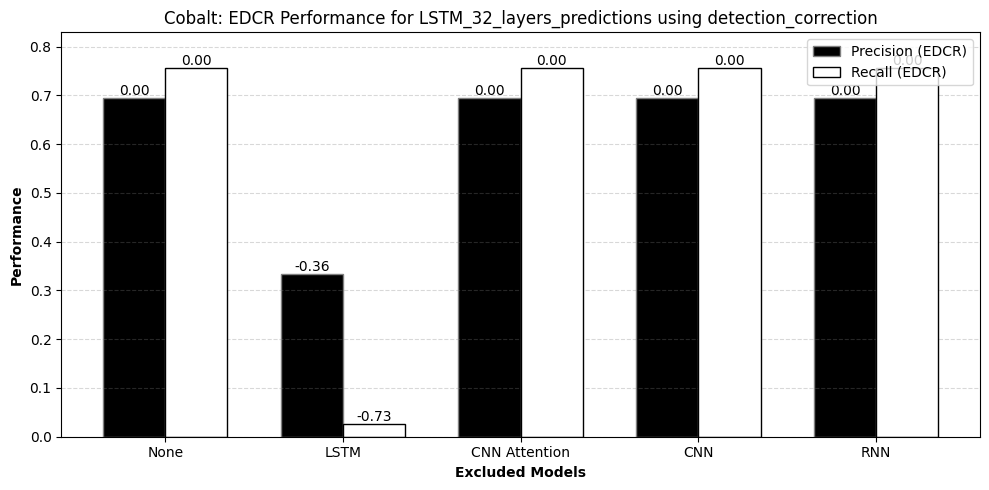

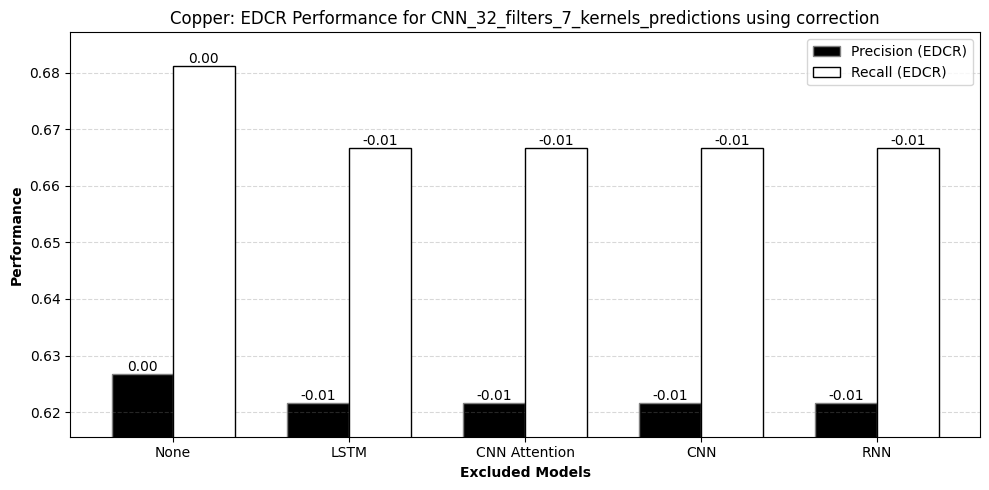

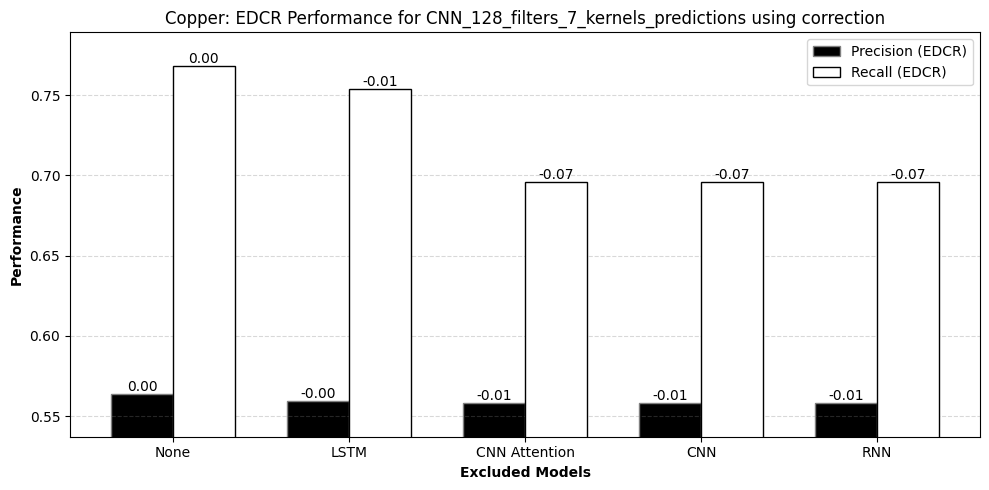

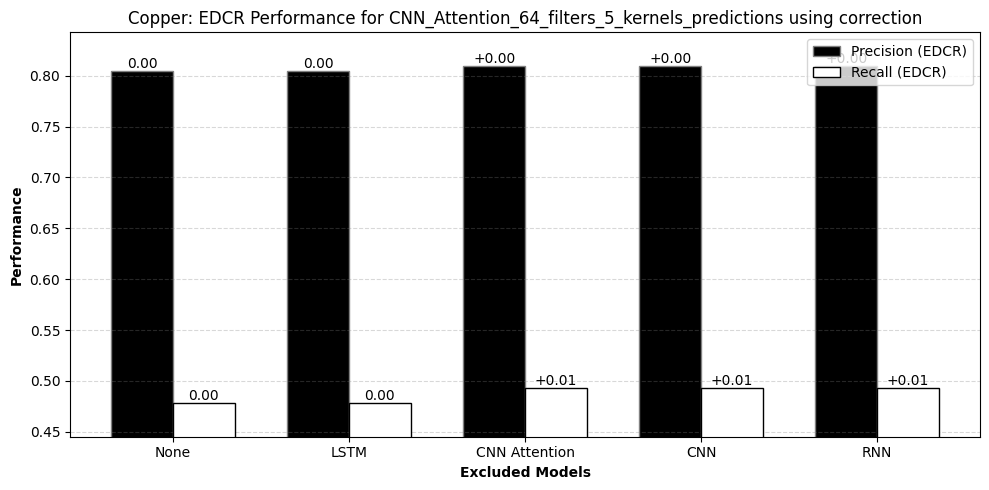

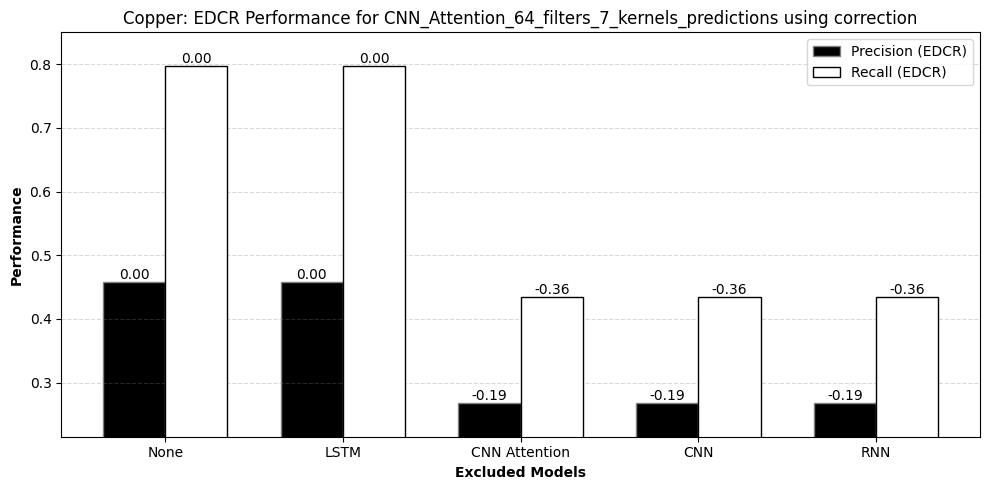

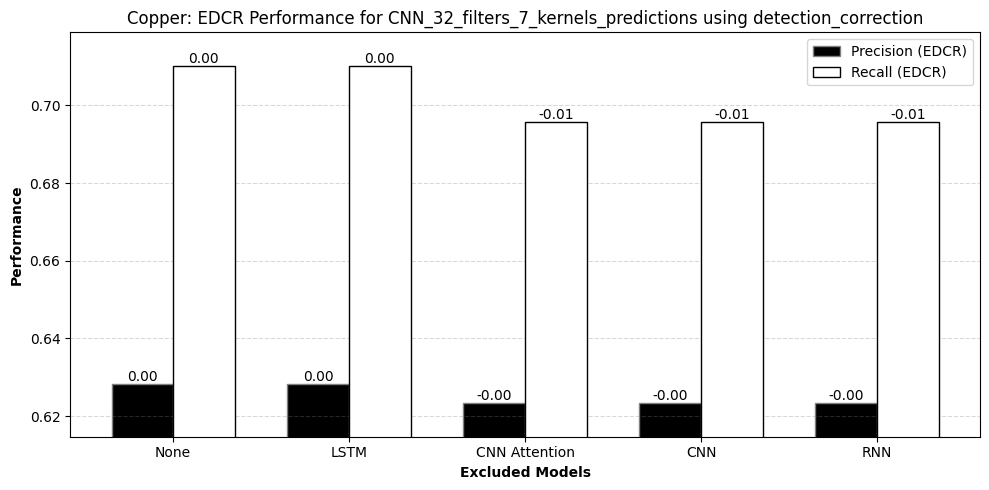

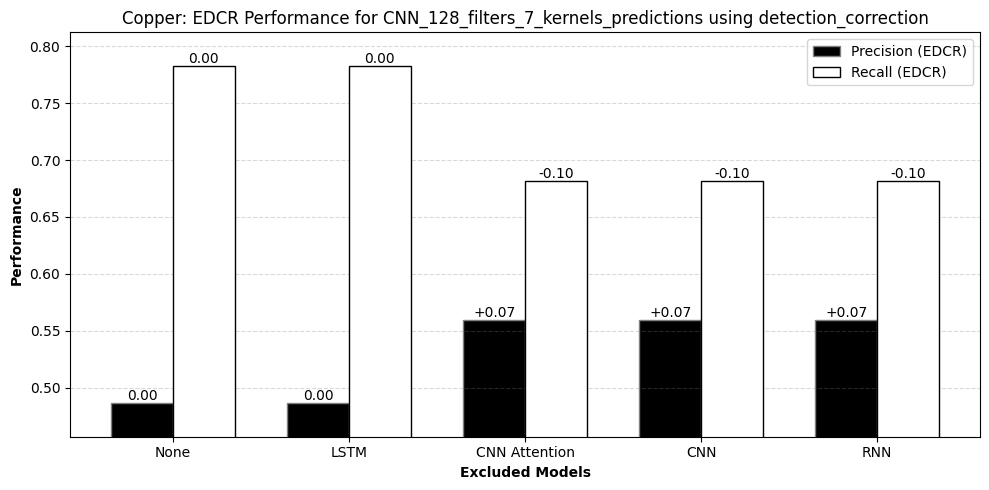

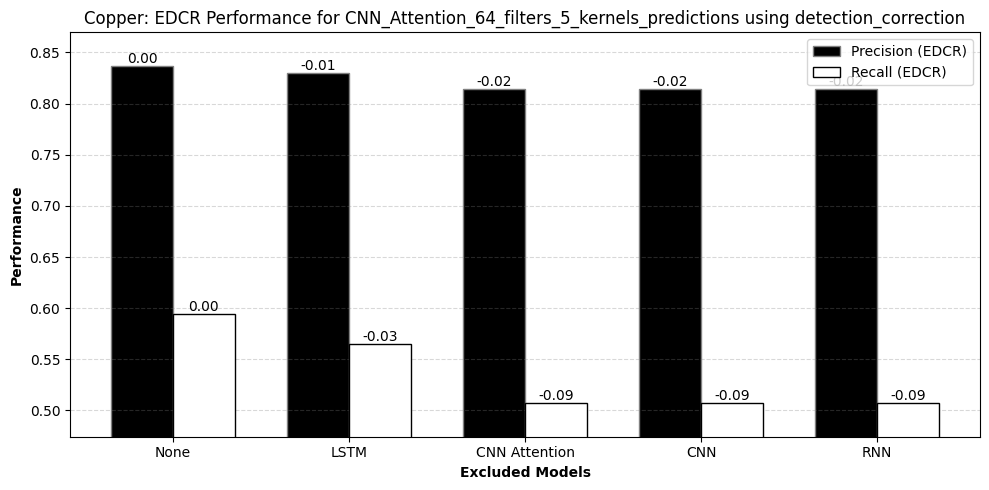

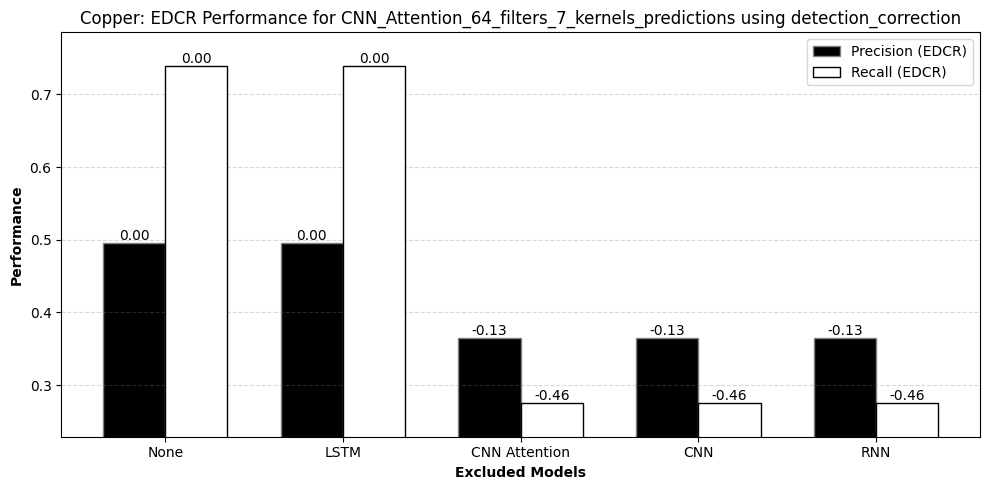

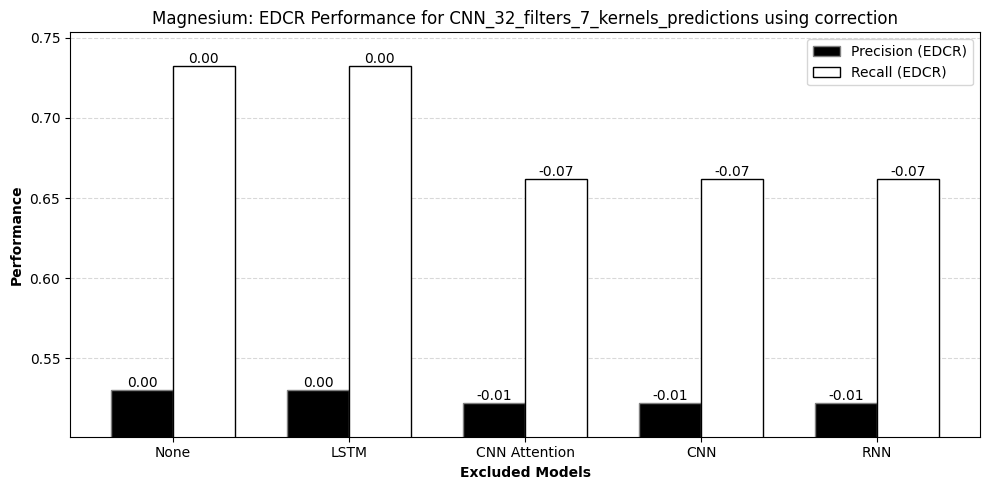

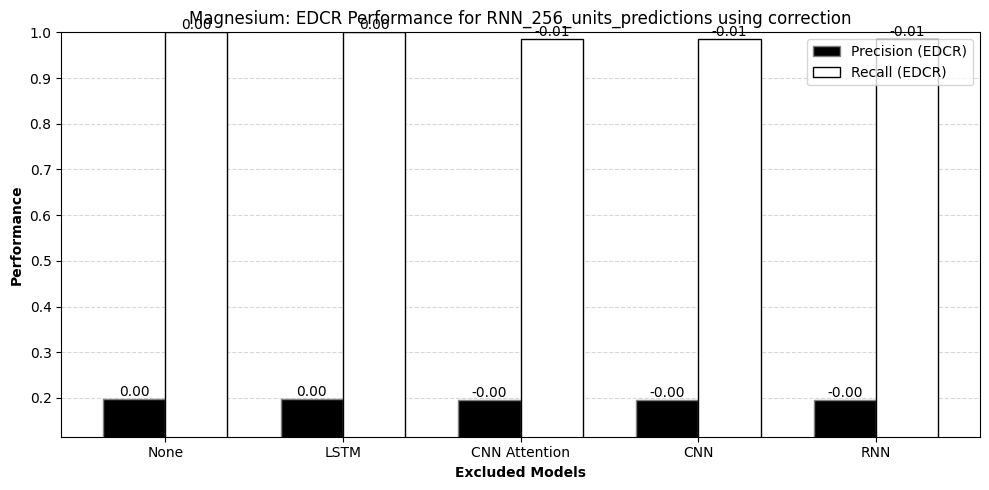

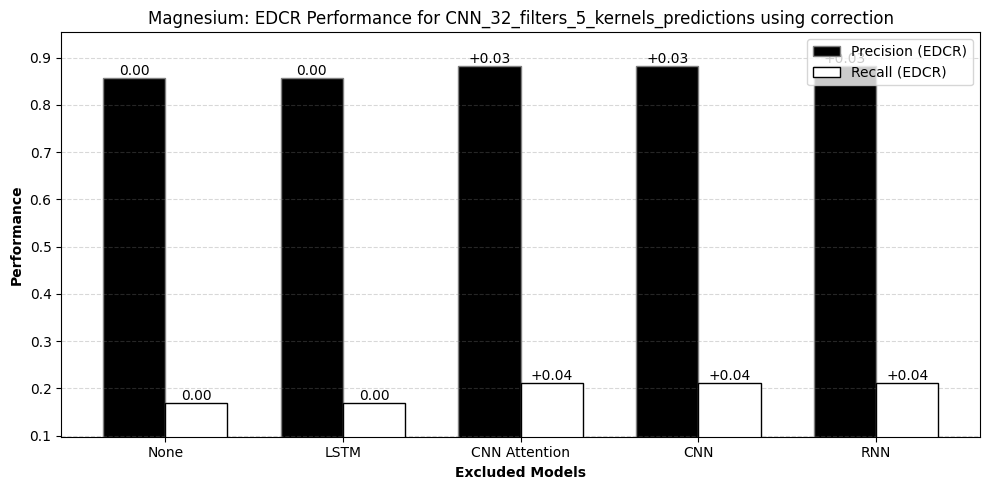

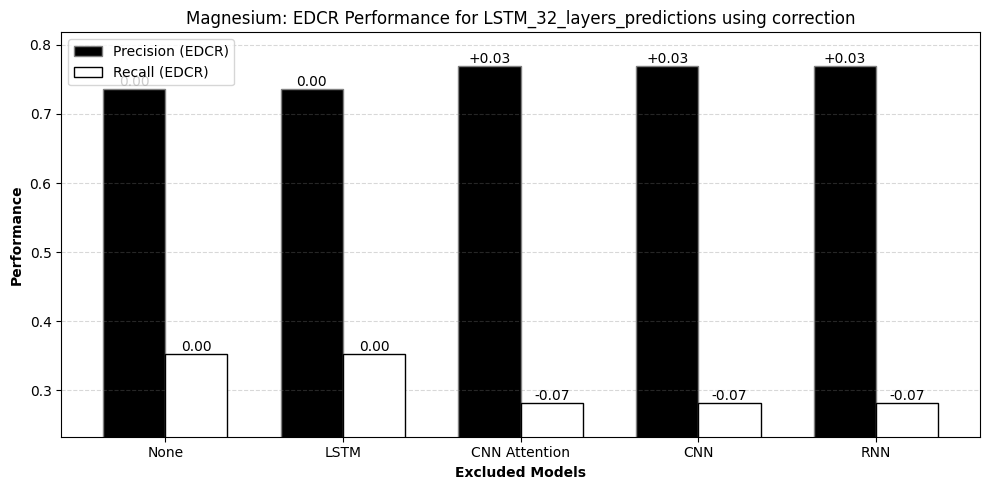

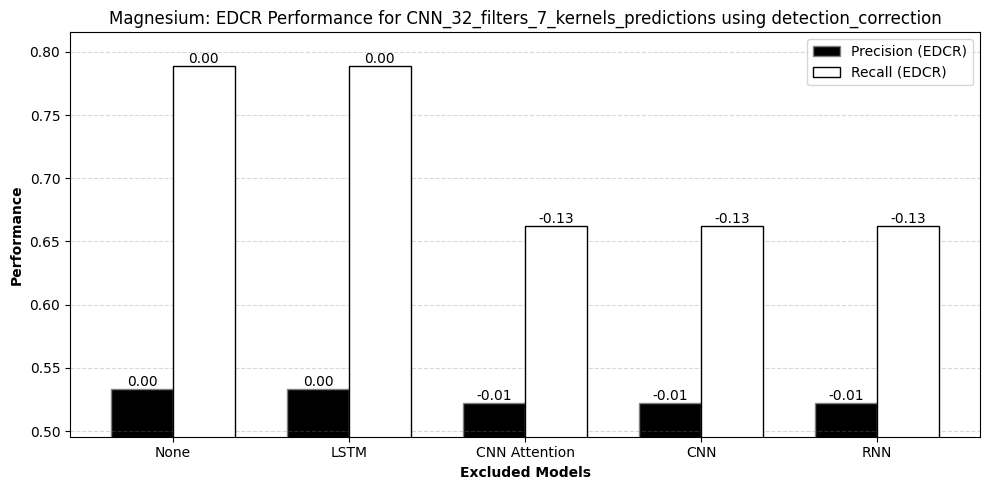

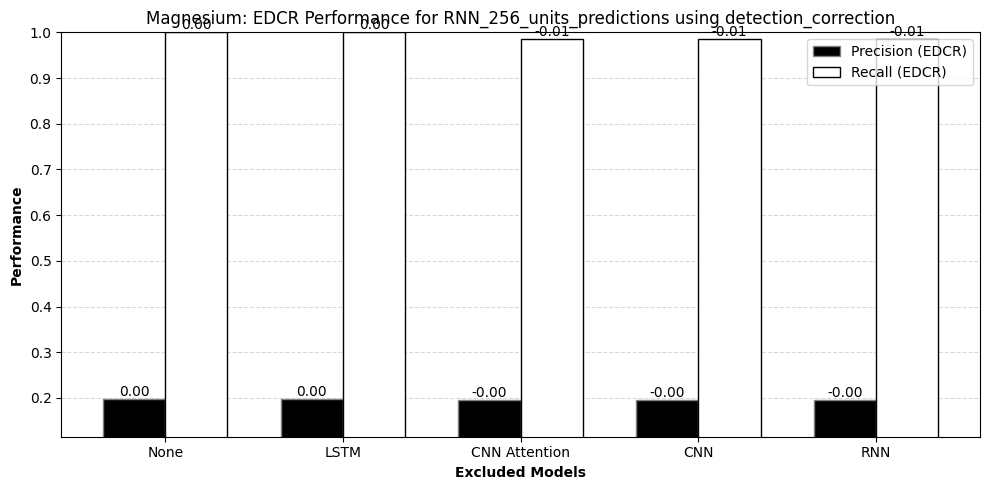

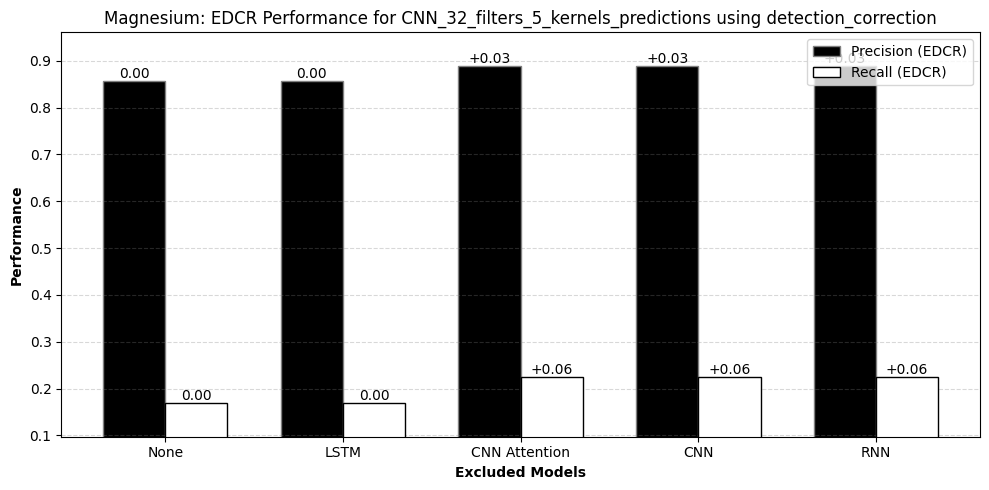

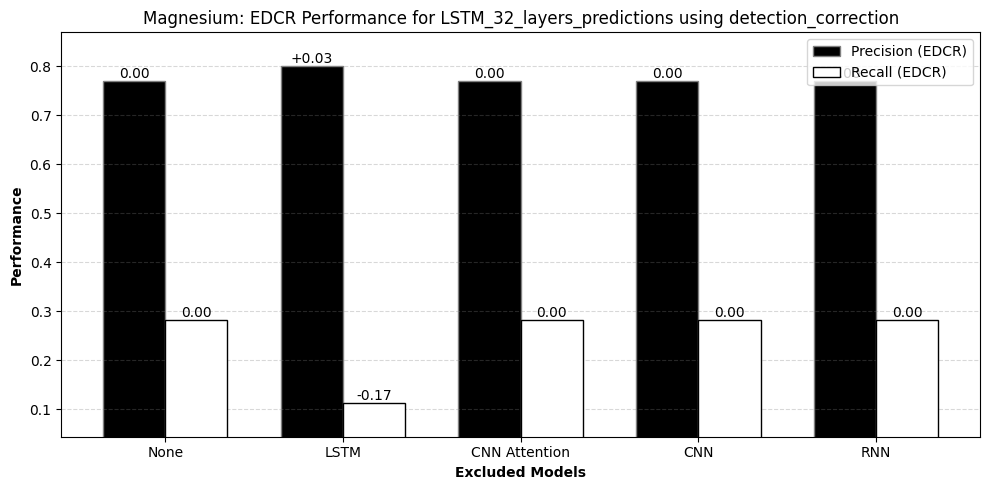

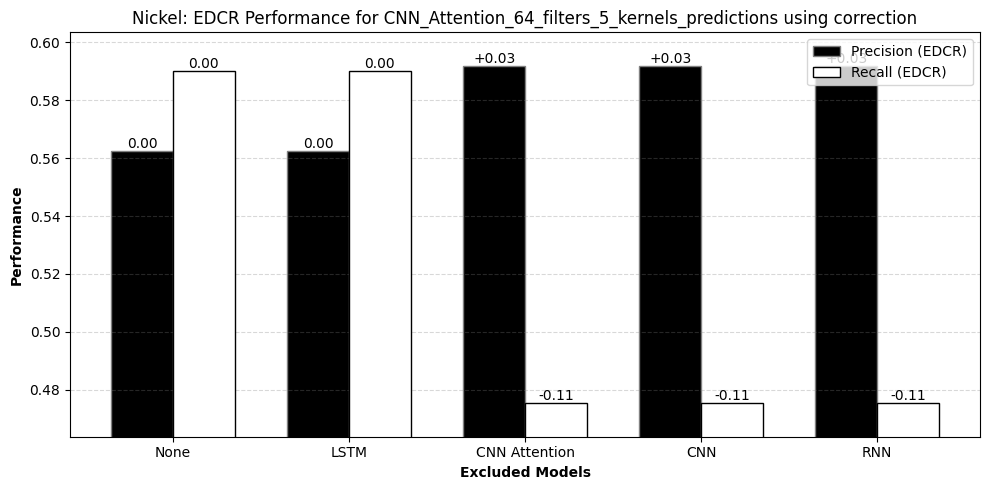

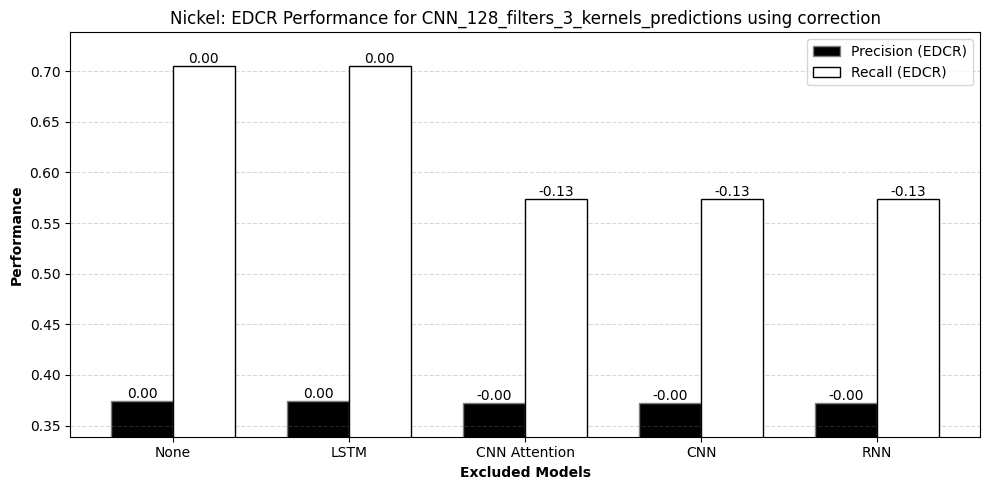

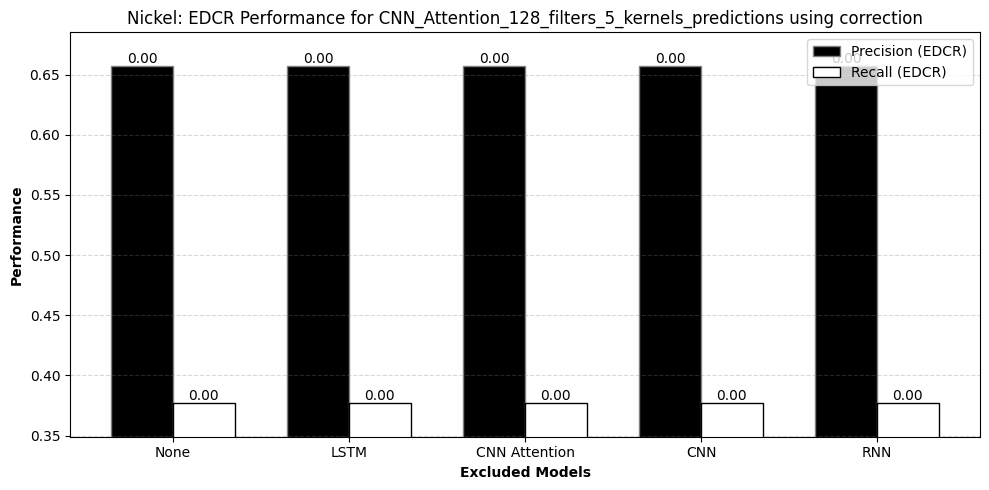

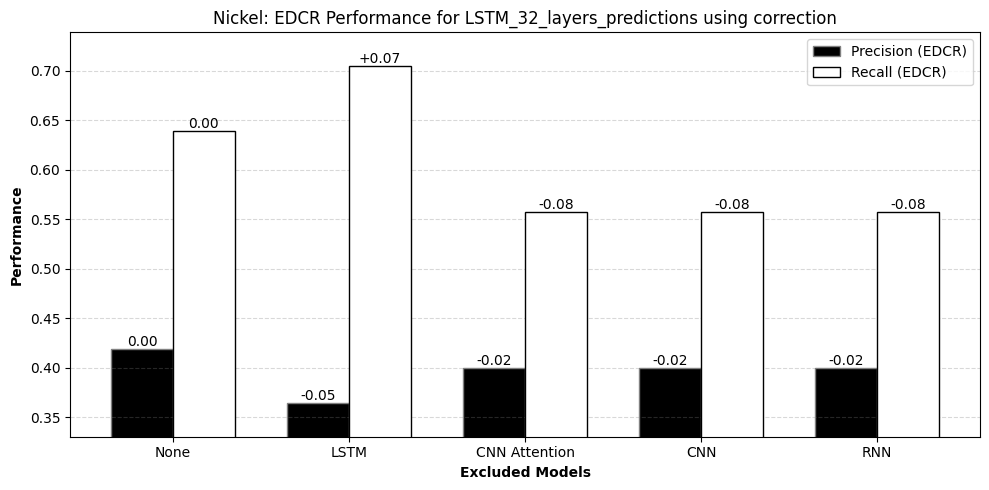

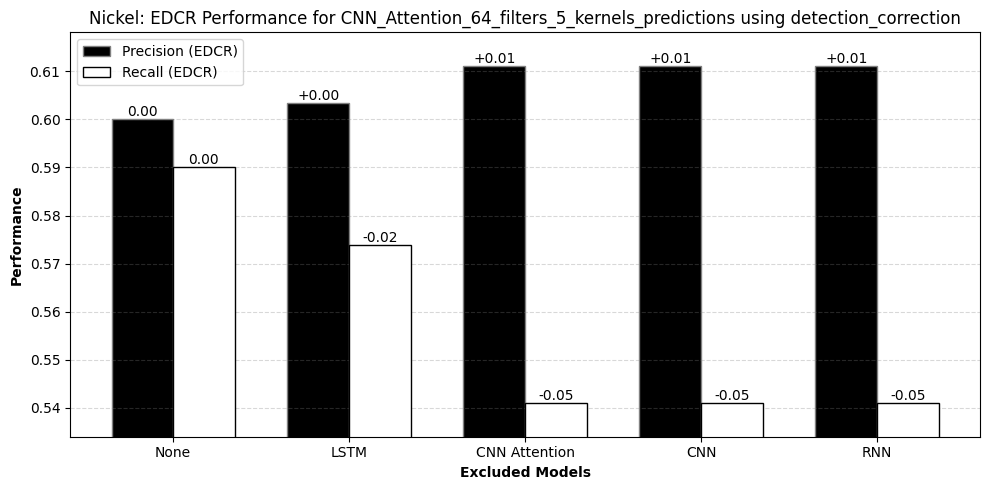

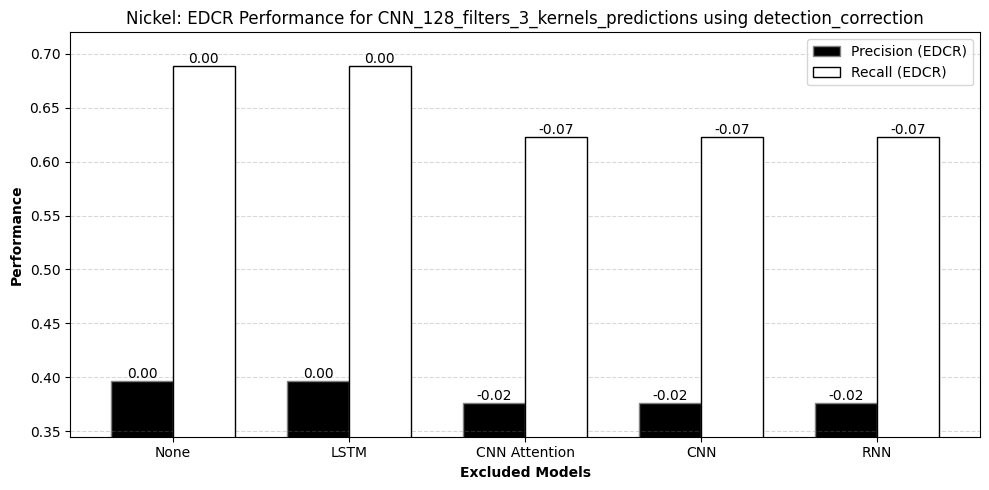

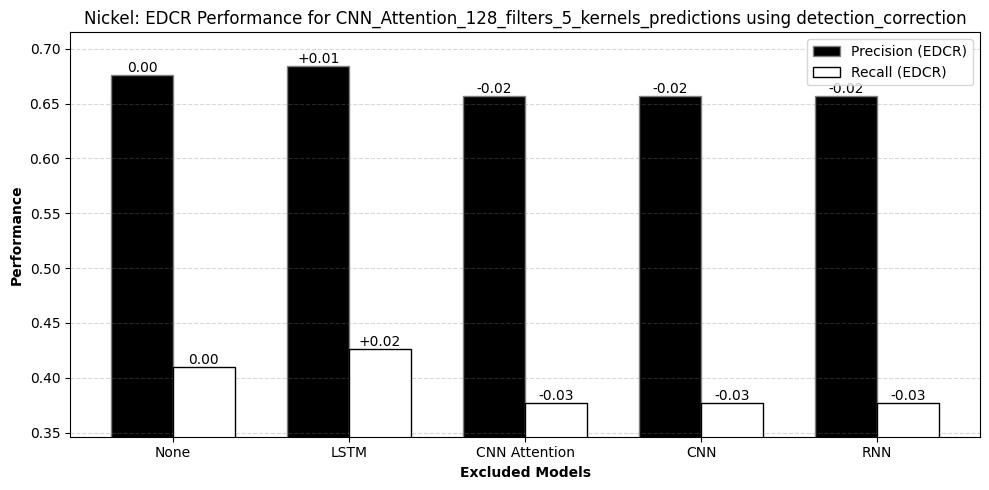

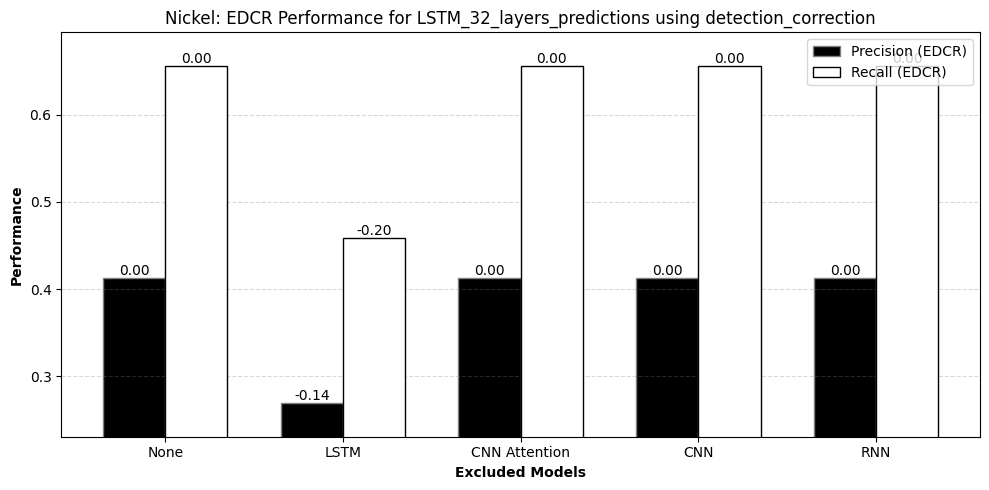

In [16]:
for comm in COMMODITY:
    for algo in ALGO:
        plot_ablation_barcharts(f'out/top_f1/{comm}_results.xlsx', algo, comm)


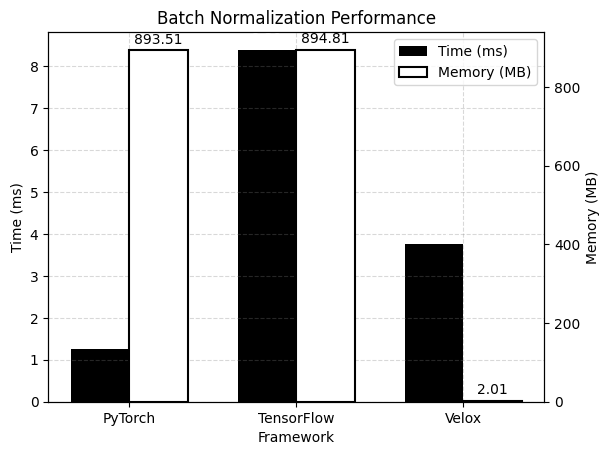

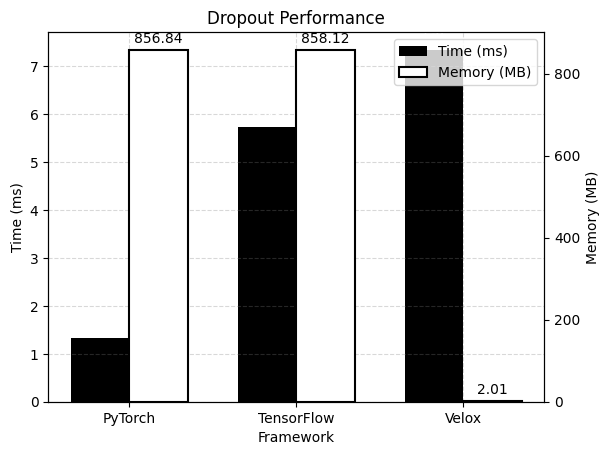

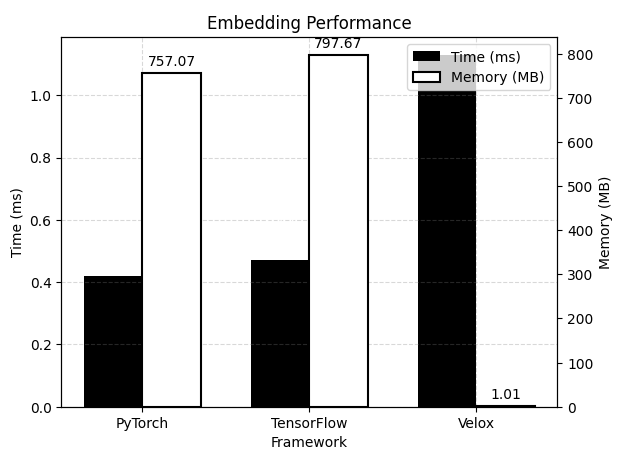

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
technologies = ['PyTorch', 'TensorFlow', 'Velox']
time_data = {
    'Batch Normalization': [1.26, 8.39, 3.75],
    'Dropout': [1.33, 5.73, 7.35],
    'Embedding': [0.42, 0.47, 1.13]
}
memory_data = {
    'Batch Normalization': [893.51, 894.81, 2.00781],
    'Dropout': [856.84, 858.12, 2.00781],
    'Embedding': [757.07, 797.67, 1.00586]
}

# Create a bar chart for each feature
for feature in ['Batch Normalization', 'Dropout', 'Embedding']:
    fig, ax1 = plt.subplots()

    # Bar locations
    ind = np.arange(len(technologies))
    width = 0.35

    # Time data bars
    time_bars = ax1.bar(ind - width/2, time_data[feature], width, label='Time (ms)', color='black')
    ax1.set_xlabel('Framework')
    ax1.set_ylabel('Time (ms)', color='black')
    ax1.set_title(f'{feature} Performance')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(technologies)
    ax1.tick_params(axis='y', labelcolor='black')

    # Enable grid for better visibility of tick lines
    ax1.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)

    # Annotate each time bar with its respective value
    for bar in time_bars:
        yval = bar.get_height()
        # Ensuring the text is visibly above the bar
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', color='white')

    # Create a second y-axis for memory data
    ax2 = ax1.twinx()
    memory_bars = ax2.bar(ind + width/2, memory_data[feature], width, label='Memory (MB)', 
                          color='white', edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('Memory (MB)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Annotate each memory bar with its respective value
    for bar in memory_bars:
        yval = bar.get_height()
        # Adjust the position slightly higher for clarity
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.2f}', ha='center', va='bottom', color='black')

    # Adding legend
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.show()



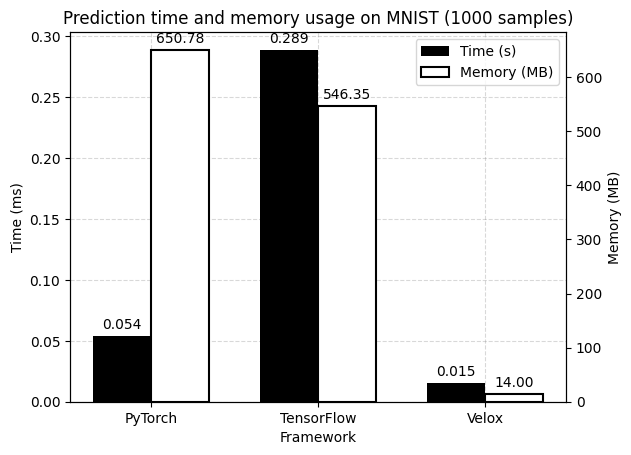

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
technologies = ['PyTorch', 'TensorFlow', 'Velox']
times = [0.05433320999, 0.2891306877, 0.015375]  # Time in milliseconds
memories = [650.7773438, 546.3515625, 14]  # Memory usage in MB

fig, ax1 = plt.subplots()

# Bar locations
ind = np.arange(len(technologies))  # the x locations for the groups
width = 0.35  # the width of the bars

# Plotting time bars
time_bars = ax1.bar(ind - width/2, times, width, label='Time (s)', color='black', zorder=3)

# Memory bars
ax2 = ax1.twinx()
memory_bars = ax2.bar(ind + width/2, memories, width, label='Memory (MB)', color='white', edgecolor='black', linewidth=1.5, zorder=3)

# Adding labels, titles and grid
ax1.set_xlabel('Framework')
ax1.set_ylabel('Time (ms)', color='black')
ax2.set_ylabel('Memory (MB)', color='black')
ax1.set_title('Prediction time and memory usage on MNIST (1000 samples)')
ax1.set_xticks(ind)
ax1.set_xticklabels(technologies)
ax1.grid(True, linestyle='--', which='both', color='grey', alpha=0.3, zorder=0)

# Annotating bars with values
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax = bar.axes  # Corrected from `get_axes` to `axes`
        if bars == time_bars:
            ax.annotate(f'{height:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', color='black')

add_values(time_bars)
add_values(memory_bars)

fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show plot
plt.show()

